# Movielens Case Study

### Analysis Tasks to be performed:

#### Import the three datasets
#### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
#### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
#### 1.User Age Distribution
#### 2.User rating of the movie “Toy Story”
#### 3.Top 25 movies by viewership rating
#### 4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696

### Feature Engineering:

####            Use column genres:

##### 1.Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
##### 2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
##### 3Determine the features affecting the ratings of any particular movie.
##### 4Develop an appropriate model to predict the movie ratings

In [1]:
# Importing Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
# Importing warnings and applying filter,not to display any warnings

import warnings
warnings.simplefilter('ignore')

In [3]:
# Display output without any truncation of rows and columns i.e. shows all columns and rows

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
#Importing/Loading 3 datasets

movies_data=pd.read_csv('movies.dat',delimiter='::',names=['Movie_id','Title','Genre'],encoding='latin1')
ratings_data=pd.read_csv('ratings.dat',delimiter='::',names=['User_id','Movie_id','Rating','TimeStamp'],encoding='latin1')
user_data=pd.read_csv("users.dat",delimiter='::',names=['User_id','Gender','Age','Occupation','ZipCode'],encoding='latin1')

In [5]:
# displays top 2 rows of Movies Data

movies_data.head(2)

,Movie_id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [6]:
# shows description of Movies data

movies_data.describe() 

,Movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
# displays top 2 rows of Ratings Data

ratings_data.head(2)

,User_id,Movie_id,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [8]:
# shows description of Ratings data

ratings_data.describe()

,User_id,Movie_id,Rating,TimeStamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [9]:
# displays top 2 rows of User Data

user_data.head(2)

,User_id,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072


In [10]:
# shows description of User data

user_data.describe()

,User_id,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [11]:
# Merging the Three Dataset and creating Master Data

data1=pd.merge(movies_data,ratings_data,on='Movie_id')
master_data=pd.merge(data1,user_data,on='User_id')

In [12]:
# Display top 5 rows of Master Data

master_data.head()

,Movie_id,Title,Genre,User_id,Rating,TimeStamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [13]:
# shows description of Master _data

master_data.describe()

,Movie_id,User_id,Rating,TimeStamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


### Finding User Age Distribution

In [14]:
#  count of unique values in age column of master data

Age_grp=master_data['Age'].value_counts() 
Age_grp

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [15]:
# Value	Description

# 1	   "Under 18"
# 18	"18-24"
# 25	"25-34"
# 35	"35-44"
# 45	"45-49"
# 50	"50-55"
# 56	"56+"

In [16]:
# returning percentage count of unique values in age column of master data

master_data['Age'].value_counts(normalize=True) 

25    0.395473
35    0.198961
18    0.183498
45    0.083616
50    0.072475
56    0.038772
1     0.027205
Name: Age, dtype: float64

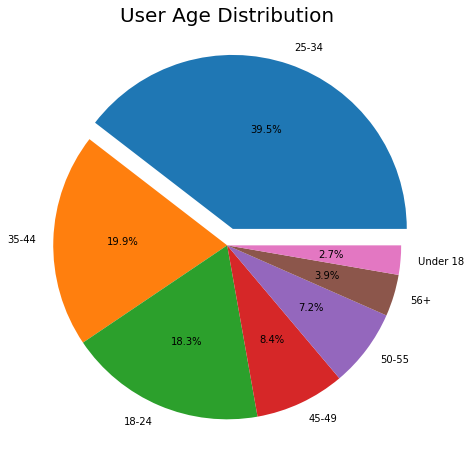

In [17]:
# Ploting Pie Chart for User Age distribution
# Clearly Maximum age groups rated are between age group 25-34 as highest percentage is 39.54

plt.figure(figsize=(8,8))
plt.title("User Age Distribution",fontsize=20)
plt.pie(Age_grp,labels=['25-34','35-44','18-24','45-49','50-55','56+','Under 18'],explode=[0.1,0,0,0,0,0,0],autopct="%.1f%%")
plt.show()

### User rating of the movie “Toy Story”

In [18]:
# Assigning new table Title_Rating  with only Movie Title and Rating Columns from master data

Title_Rating=master_data[["Title",'Rating']]

In [19]:
# Collecting only Ratings of Movie with Title 'Toy Story (1995)' 

Toystory=Title_Rating[Title_Rating['Title']=='Toy Story (1995)']

In [20]:
# Displaying top 2 rows of Torystory Movie 

Toystory.head(2)

,Title,Rating
0,Toy Story (1995),5
53,Toy Story (1995),4


In [21]:
# Displaying Number of unique Ratings of movie Toystory,clearly movie has maximum 4 ratings
Toystory['Rating'].value_counts()


4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

In [22]:
# Diplaying Average Rating of Toystory Movie
# Toy story movie has average rating of 4.1468

Toystory['Rating'].mean()  

4.146846413095811

### Top 25 movies by viewership rating

In [23]:
# Storing Average Ratings of all movie in Avg_rating Table from Title Rating data

Avg_rating=Title_Rating.groupby('Title').mean()

In [24]:
# Displaying top 25 Movies based on Average Ratings 

Avg_rating.sort_values('Rating',ascending=False).head(25)

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


###  Finding Ratings for all the movies reviewed by for a particular user of user id = 2696

In [25]:
# Displaying all Movies and Ratings done by User Id=2696

master_data[master_data['User_id']==2696]

,Movie_id,Title,Genre,User_id,Rating,TimeStamp,Gender,Age,Occupation,ZipCode
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


## Feature Engineering

### Finding Unique Categories of Genres

In [26]:
# Creating list to store all Genres  from Genre Column of Master Data

lis1=[]
for i in master_data['Genre']:
    x=i.split('|')
    lis1.extend(x)

In [27]:
# Creating Set of List Genres to obtain Unique categories of genre

U_Genre=set(lis1)

In [28]:
#Displaying Unique Categories of genres

print(U_Genre)

{'War', 'Thriller', 'Animation', 'Horror', 'Action', 'Adventure', 'Drama', "Children's", 'Musical', 'Romance', 'Documentary', 'Film-Noir', 'Mystery', 'Fantasy', 'Comedy', 'Western', 'Crime', 'Sci-Fi'}


### Creating Seperate Column using One hot Encoding for each category of Genres

In [29]:
# Droping Timestamp and ZipCode Columns from Master data

master_data=master_data.drop(['TimeStamp','ZipCode'],axis=1)

In [30]:
# Displaying top 2 rows of Master_data

master_data.head(2)

,Movie_id,Title,Genre,User_id,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10


In [31]:
# Converting Categorical data Gender to numerical data

master_data['Gender']=master_data['Gender'].map({"F":0,"M":1})

In [32]:
# Displaying top 2 rows of Master_data after conversion of gender data

master_data.head(2)

,Movie_id,Title,Genre,User_id,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,0,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,0,1,10


In [33]:
# Creating seperate columns for each category of genre using one hot encoding

for i in U_Genre:
    master_data[i]=master_data['Genre'].apply(lambda x: 1 if i in x else 0)

In [34]:
# Displaying top 2 rows of Master_data

master_data.head(2)

,Movie_id,Title,Genre,User_id,Rating,Gender,Age,Occupation,War,Thriller,Animation,Horror,Action,Adventure,Drama,Children's,Musical,Romance,Documentary,Film-Noir,Mystery,Fantasy,Comedy,Western,Crime,Sci-Fi
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,0,1,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,0,1,10,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0


###  Features affecting the ratings of any particular movie

In [35]:
# Checking Correlation with Rating of all other columns

master_data.corr()[['Rating']]

,Rating
Movie_id,-0.064042
User_id,0.012303
Rating,1.000000
Gender,-0.019861
Age,0.056869
Occupation,0.006753
War,0.075688
Thriller,-0.004806
Animation,0.019670
Horror,-0.094353


In [36]:
# Displaying columns of master data

master_data.columns

Index(['Movie_id', 'Title', 'Genre', 'User_id', 'Rating', 'Gender', 'Age',
       'Occupation', 'War', 'Thriller', 'Animation', 'Horror', 'Action',
       'Adventure', 'Drama', 'Children's', 'Musical', 'Romance', 'Documentary',
       'Film-Noir', 'Mystery', 'Fantasy', 'Comedy', 'Western', 'Crime',
       'Sci-Fi'],
      dtype='object')

In [37]:
# Declaring Feature variable affecting Movie ratings for Regression

x_feature=master_data[['Gender', 'Age','Occupation',"Children's", 'Horror', 'Sci-Fi', 'Comedy', 'Mystery', 'War',
       'Film-Noir', 'Adventure', 'Romance', 'Crime', 'Thriller', 'Documentary',
       'Musical', 'Western', 'Drama', 'Action', 'Fantasy', 'Animation']]

In [38]:
# Declaring Target/Label Variable 

y_label=master_data[['Rating']]

### Creating Model for Movie Prediction

In [39]:
# Declaring Train, test and splitting in 75/25 % Ratio

x_train,x_test,y_train,y_test=train_test_split(x_feature,y_label,test_size=.25)

In [40]:
# Assigning Linear Model 

Model=LinearRegression()

In [41]:
# Fitting Train data on or Model

Model.fit(x_train,y_train)

LinearRegression()

In [42]:
# Our Model Scores on test data

Model.score(x_test,y_test)

0.03800592523708535

In [43]:
# Our Model Scores on train data

Model.score(x_train,y_train)

0.0378308640067222

In [44]:
# Predicting Test data

Model.predict(x_test)

array([[3.64380536],
       [3.42151767],
       [3.400828  ],
       ...,
       [3.14980435],
       [3.43174745],
       [3.61830107]])